In [7]:
from src.general.io_handling import pickle_in_data

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt
from src.visualization.visualize_fitness import ExtendedBreadthProcessProtocolData, InjectionKlDistance
from src.data.gillespie_models import define_n_initial
import datetime
np.set_printoptions(suppress=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/'

/home/rganti/.pkg/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/home/rganti/.pkg/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/home/rganti/.pkg/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


Text(15,-0.09,'(b)')

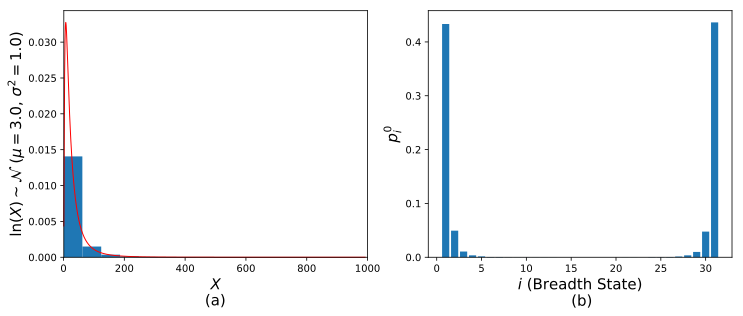

In [9]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)

num_bins = 31
n_b_cells = 50000
index = (num_bins + 1) / 2
length = 1000

mu, sigma = 3., 1.

s = np.random.lognormal(mu, sigma, n_b_cells)
count, bins, ignored = plt.hist(s, bins=range(0, length, length/index), density=True)

x = np.linspace(bins[0], bins[-1], 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=1, color='r')
plt.xlim(1, 1000)
plt.ylabel("$\ln(X) \sim \mathcal{N}$ ($\\mu=3.0$, $\\sigma^{2}=1.0$)", size=15)
plt.xlabel("$X$", size=15)
plt.text(465, -0.0067, "(a)", size=15)
# plt.ylim(0, 0.04)

plt.subplot(2,2,2)

p0 = np.loadtxt(path + "Sigma_1.2/p0")
plt.bar(range(1, len(p0)+1), p0)
plt.ylabel("$p^{0}_{i}$", size=15)
plt.xlabel("$i$ (Breadth State)", size=15)
plt.text(15, -0.09, "(b)", size=15)


# plt.savefig("S1_pi.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

/home/rganti/Optimal_Protocols_bnAbs/src/visualization/visualize_fitness.py:28: RuntimeWarning: divide by zero encountered in log
  h_fitness = -np.sum(self.f * np.log(self.f))
/home/rganti/Optimal_Protocols_bnAbs/src/visualization/visualize_fitness.py:28: RuntimeWarning: invalid value encountered in multiply
  h_fitness = -np.sum(self.f * np.log(self.f))
/home/rganti/Optimal_Protocols_bnAbs/src/visualization/visualize_fitness.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  kl_distance.append(self.p_ini[i] * np.log(self.p_ini[i] / self.f[i]))


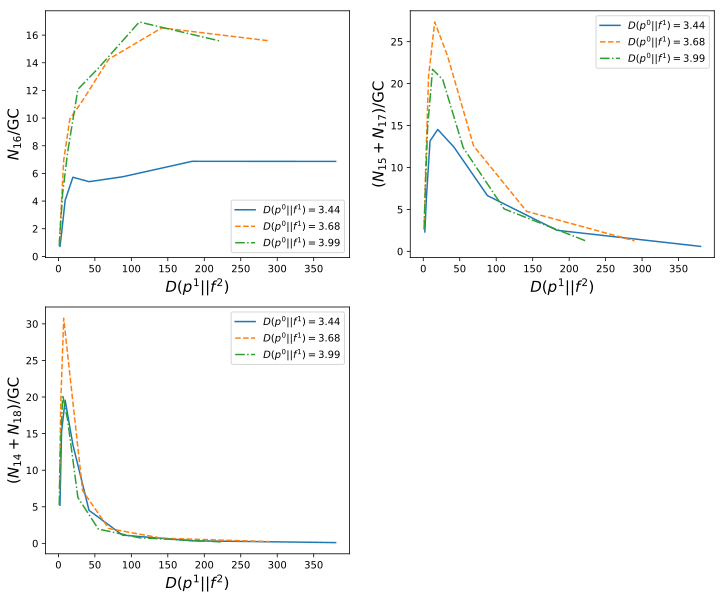

In [10]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/'
sigma_range = [1.3, 1.2, 1.1]

fitness = []
kl1_array = []
style = ['-', '--', '-.']

for i in range(len(sigma_range)):
    protocols = ExtendedBreadthProcessProtocolData(path, sigma=sigma_range[i], num_gcs=1000)
    protocols.plot(0, linestyle=style[i])
    fitness.append(protocols.kl1.f)
    kl1_array.append(protocols.kl1.compute_kl_distance())
    
plt.xlabel("$D(p^{1} || f^{2})$", size=15)
plt.ylabel("$N_{16}$/GC", size=15)

plt.subplot(2,2,2)

for i in range(len(sigma_range)):
    protocols = ExtendedBreadthProcessProtocolData(path, sigma=sigma_range[i], num_gcs=1000)
    protocols.plot(1, linestyle=style[i])

plt.xlabel("$D(p^{1} || f^{2})$", size=15)
plt.ylabel("$(N_{15} + N_{17})$/GC", size=15)

plt.subplot(2,2,3)

for i in range(len(sigma_range)):
    protocols = ExtendedBreadthProcessProtocolData(path, sigma=sigma_range[i], num_gcs=1000)
    protocols.plot(2, linestyle=style[i])

plt.xlabel("$D(p^{1} || f^{2})$", size=15)
plt.ylabel("$(N_{14} + N_{18})$/GC", size=15)

plt.savefig("S2_protocol_curves.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

# plt.subplot(2,2,4)
# fraction = []
# kl1 = []
# sigma_range = [1.4, 1.35, 1.3, 1.25, 1.2, 1.0]
# for sigma in sigma_range:
#     protocols = ExtendedBreadthProcessProtocolData(path, sigma=sigma, num_gcs=1000)
#     fraction.append(protocols.survival_fraction)
#     kl1.append(protocols.kl1.compute_kl_distance())

# plt.plot(kl1, fraction, marker='o', color='r')
# plt.axvline(x=3.68, color="black", linestyle='--', label='optimal prime')

# plt.xlabel("$D(p^{0} || f^{1})$", size=15)
# plt.ylabel("$P($GC Survival$)$", size=15)
# plt.legend()




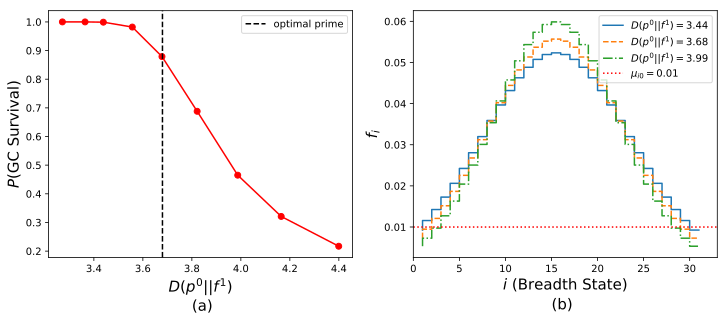

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
fraction = []
kl1 = []
sigma_range = [1.4, 1.35, 1.3, 1.25, 1.2, 1.15, 1.1, 1.05, 1.0]

for sigma in sigma_range:
    protocols = ExtendedBreadthProcessProtocolData(path, sigma=sigma, num_gcs=1000)
    fraction.append(protocols.survival_fraction)
    kl1.append(protocols.kl1.compute_kl_distance())

plt.plot(kl1, fraction, marker='o', color='r')
plt.axvline(x=3.68, color="black", linestyle='--', label='optimal prime')

plt.xlabel("$D(p^{0} || f^{1})$", size=15)
plt.ylabel("$P($GC Survival$)$", size=15)
plt.legend()
plt.text(3.8, -0.008, "(a)", size=15)

plt.subplot(2,2,2)

x_array = range(1, 32)
style = ['-', '--', '-.']
for i in range(len(fitness)):
    plt.step(x_array, fitness[i], linestyle=style[i], label='$D(p^{0} || f^{1}) = ' + '%.2f' % kl1_array[i] + '$')

x_array = range(0, 34)
plt.plot(x_array, np.zeros_like(x_array) + 0.01, 
         color='red', linestyle=':', label="$\\mu_{i0} = 0.01$")
plt.ylabel("$f_{i}$", size=15)
plt.xlabel("$i$ (Breadth State)", size=15)
plt.xlim(0, 33)
plt.legend()
plt.text(15, -0.01, "(b)", size=15)

plt.savefig("S3_survival_fraction.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)


# Scratch

In [ ]:

for i in range(1, len(protocol_data.fitness_array) - 1):
    plt.step(x_array, protocol_data.fitness_array[i], 
             label='$D(p^{0} || f^{1}) = ' + '%.2f' % protocol_data.kl1_array[i] + '$')



In [3]:
1./15

0.06666666666666667

In [2]:
n0 = []

for i in range(1000):
    n_ini = define_n_initial(31, length=1000)
    n0.append(n_ini)

In [60]:
np.mean(n0, axis=0)

array([21.701,  2.451,  0.518,  0.175,  0.077,  0.033,  0.016,  0.009,
        0.004,  0.005,  0.004,  0.001,  0.002,  0.001,  0.001,  0.001,
        0.   ,  0.002,  0.   ,  0.   ,  0.003,  0.003,  0.01 ,  0.007,
        0.028,  0.03 ,  0.058,  0.179,  0.512,  2.418, 21.749])

In [61]:
'{0}'.format(datetime.timedelta(minutes=1430))

'23:50:00'

In [7]:
path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/"
sigma_range = np.loadtxt(path + "sigma_1_range")

/home/rganti/.pkg/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/rganti/.pkg/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':
/home/rganti/.pkg/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':


<BarContainer object of 31 artists>

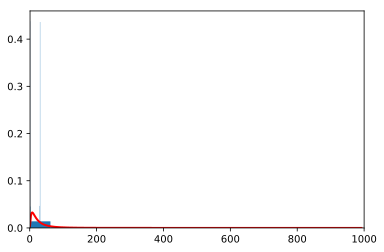

In [21]:
num_bins = 31
n_b_cells = 50000
index = (num_bins + 1) / 2
length = 1000

mu, sigma = 3., 1.

s = np.random.lognormal(mu, sigma, n_b_cells)
count, bins, ignored = plt.hist(s, bins=range(0, length, length/index), density=True)

x = np.linspace(bins[0], bins[-1], 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.xlim(1, 1000)




In [15]:
bins

array([  0,  62, 124, 186, 248, 310, 372, 434, 496, 558, 620, 682, 744,
       806, 868, 930, 992])

In [19]:
count

array([0.01406347, 0.00150103, 0.00036163, 0.00010807, 0.0000471 ,
       0.00002258, 0.00001065, 0.00000774, 0.00000194, 0.00000065,
       0.00000065, 0.00000161, 0.00000097, 0.00000032, 0.00000032,
       0.00000032])

In [11]:
count*(bins[1]-bins[0])

array([0.87094968, 0.0950276 , 0.02116169, 0.00660053, 0.00306024,
       0.00140011, 0.00070006, 0.00032003, 0.00024002, 0.00014001,
       0.00014001, 0.00006   , 0.00004   , 0.00010001, 0.00006   ,
       0.        ])

In [17]:
p0 = np.loadtxt(path + "Sigma_1.4/p0")

<BarContainer object of 31 artists>

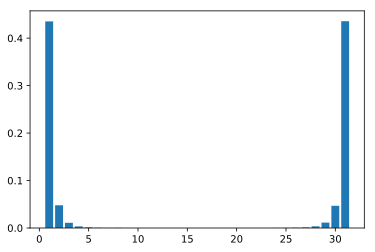

In [20]:
plt.bar(range(1, len(p0)+1), p0)

In [2]:
path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/"
sigma_range = np.loadtxt(path + "sigma_1_range")

In [3]:
sigma_range

array([1.4 , 1.35, 1.3 , 1.25, 1.2 , 1.  ])

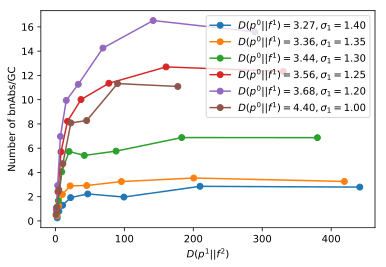

In [5]:
# sigma_1_range = [1.0, 1.2, 1.25, 1.3, 1.35, 1.4]

for sigma in sigma_range:
    protocols = ExtendedBreadthProcessProtocolData(path, sigma=sigma, num_gcs=1000)
    protocols.plot(0)

In [38]:
protocols.sigma

1.0

In [13]:
protocols.kl2_array

[1.449164547094882,
 3.2132675438073313,
 7.141844082165996,
 15.460047456040567,
 32.66838631201838,
 67.88238249594399,
 139.56335053652543,
 285.13588659340036,
 inf]

In [14]:
protocols.b_cells[0]

[944.0, 2704.0, 6050.0, 10283.0, 12758.0, 12837.0, 18032.0, 16320.0, 10779.0]

In [15]:
protocols.sigma

1.2

In [23]:
protocols.kl2_array

[2.905813335499608,
 5.475440443306709,
 11.145558246145194,
 23.21906288899794,
 48.494376602588495,
 100.98624298759498,
 209.58907597326626,
 433.9117974608671,
 inf]

In [22]:
protocols.b_cells[0]

[3.0, 6.0, 20.0, 3.0, 40.0, 104.0, 130.0, 148.0, 0.0]

In [17]:
protocols.b_cells

{0: [0.0, 23.0, 11.0, 21.0, 29.0, 67.0, 146.0, 148.0, 0.0],
 1: [3.0, 52.0, 86.0, 169.0, 319.0, 75.0, 14.0, 9.0, 0.0],
 2: [24.0, 130.0, 313.0, 219.0, 199.0, 17.0, 2.0, 2.0, 0.0],
 3: [47.0, 245.0, 340.0, 69.0, 106.0, 7.0, 0.0, 4.0, 0.0],
 4: [155.0, 321.0, 217.0, 28.0, 34.0, 5.0, 1.0, 4.0, 0.0],
 5: [194.0, 283.0, 132.0, 24.0, 26.0, 6.0, 1.0, 9.0, 0.0],
 6: [359.0, 249.0, 80.0, 9.0, 19.0, 3.0, 4.0, 12.0, 0.0],
 7: [341.0, 141.0, 47.0, 12.0, 11.0, 3.0, 1.0, 3.0, 0.0],
 8: [305.0, 108.0, 39.0, 5.0, 10.0, 2.0, 4.0, 1.0, 0.0],
 9: [271.0, 69.0, 23.0, 7.0, 5.0, 1.0, 6.0, 0.0, 0.0],
 10: [197.0, 45.0, 20.0, 5.0, 8.0, 2.0, 4.0, 1.0, 0.0],
 11: [169.0, 34.0, 13.0, 2.0, 5.0, 1.0, 3.0, 0.0, 0.0],
 12: [135.0, 16.0, 10.0, 4.0, 3.0, 1.0, 5.0, 0.0, 0.0],
 13: [110.0, 16.0, 13.0, 3.0, 5.0, 2.0, 1.0, 0.0, 0.0],
 14: [105.0, 18.0, 10.0, 5.0, 1.0, 2.0, 4.0, 0.0, 0.0],
 15: [185.0, 50.0, 46.0, 18.0, 20.0, 6.0, 4.0, 7.0, 0.0]}

In [14]:
protocols.b_cells[0]

[0.0,
 1.0,
 1.0,
 0.0,
 2.0,
 12.0,
 10.0,
 24.0,
 4.0,
 71.0,
 47.0,
 44.0,
 191.0,
 85.0,
 206.0,
 69.0,
 284.0,
 219.0,
 198.0]

In [16]:
25.0 + 3.0 + 53.0 + 125.0

206.0

In [15]:
11.0 + 30 + 12.0 + 10.0 + 6.0

69.0

In [9]:
136.0 + 62

198.0

In [11]:
77 + 3 + 11 + 8

99

In [13]:
3 + 15 + 2

20

In [ ]:
kl1 = InjectionKlDistance(p0_mean, sigma=sigma1, num_odes=len(p0_mean) + 1)

In [4]:
protocols.compute_p0()

Loading trajectory 0
Loading trajectory 1
Loading trajectory 2
Loading trajectory 3
Loading trajectory 4
Loading trajectory 5
Loading trajectory 6
Loading trajectory 7
Loading trajectory 8
Loading trajectory 9
Loading trajectory 10
Loading trajectory 11
Loading trajectory 12
Loading trajectory 13
Loading trajectory 14
Loading trajectory 15
Loading trajectory 16
Loading trajectory 17
Loading trajectory 18
Loading trajectory 19
Loading trajectory 20
Loading trajectory 21
Loading trajectory 22
Loading trajectory 23
Loading trajectory 24
Loading trajectory 25
Loading trajectory 26
Loading trajectory 27
Loading trajectory 28
Loading trajectory 29
Loading trajectory 30
Loading trajectory 31
Loading trajectory 32
Loading trajectory 33
Loading trajectory 34
Loading trajectory 35
Loading trajectory 36
Loading trajectory 37
Loading trajectory 38
Loading trajectory 39
Loading trajectory 40
Loading trajectory 41
Loading trajectory 42
Loading trajectory 43
Loading trajectory 44
Loading trajectory 4

In [8]:
p0 = np.loadtxt(path + "Sigma_{0}/p0".format(sigma))

In [12]:
np.sum(p0)

1.0

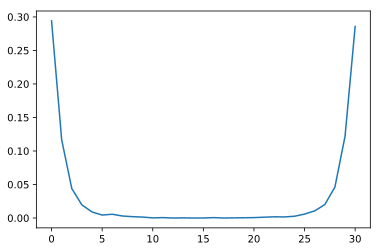

In [10]:
plt.plot(range(len(p0)), p0)

In [3]:
n0 = []

for i in range(100):
    print(i)
#     n0.append(define_n_initial(31))
    traj = np.loadtxt(path + "/hashed_traj_{0}".format(i))
    n0.append(traj[0][1:])
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [51]:
np.sum(n0, axis=0)

array([1.466e+03, 5.820e+02, 2.190e+02, 9.700e+01, 4.500e+01, 2.200e+01,
       2.800e+01, 1.500e+01, 1.000e+01, 7.000e+00, 1.000e+00, 3.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
       1.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 9.000e+00, 8.000e+00,
       1.300e+01, 2.900e+01, 5.300e+01, 1.000e+02, 2.300e+02, 6.070e+02,
       1.424e+03])

In [52]:
ntot = np.sum(n0, axis=0)

In [53]:
ntot

array([1.466e+03, 5.820e+02, 2.190e+02, 9.700e+01, 4.500e+01, 2.200e+01,
       2.800e+01, 1.500e+01, 1.000e+01, 7.000e+00, 1.000e+00, 3.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
       1.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 9.000e+00, 8.000e+00,
       1.300e+01, 2.900e+01, 5.300e+01, 1.000e+02, 2.300e+02, 6.070e+02,
       1.424e+03])

<BarContainer object of 31 artists>

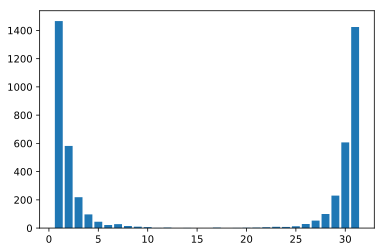

In [56]:
plt.bar(range(1, len(ntot)+1), ntot)


(1, 500)

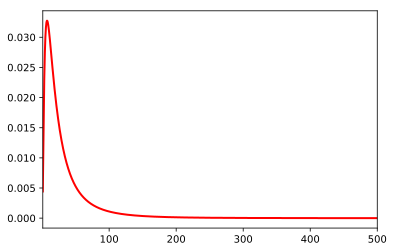

In [27]:
mu, sigma = 3., 1. # mean and standard deviation

x = np.linspace(1, 1000, 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.xlim(1, 500)

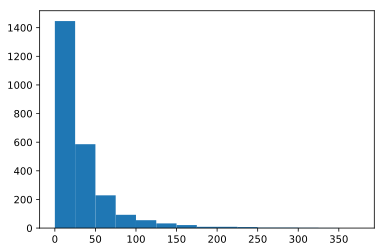

In [55]:
n_b_cells = 2500
mu, sigma = 3., 1. # mean and standard deviation

index = 16

s = np.random.lognormal(mu, sigma, n_b_cells)

count, bins, ignored = plt.hist(s, bins=range(0, 400, 25), density=False, align='mid')



<BarContainer object of 16 artists>

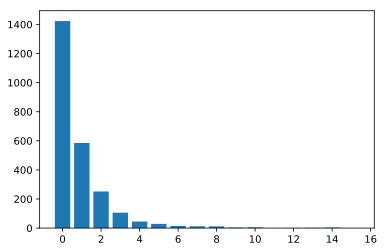

In [185]:
400/16

25

In [176]:
count, bins = np.histogram(s, bins=range(0, 400, 25))

In [177]:
len(count)

15

In [178]:
bins

array([  0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300,
       325, 350, 375])

/home/rganti/.pkg/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/rganti/.pkg/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in divide
  del sys.path[0]
/home/rganti/.pkg/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in divide
  del sys.path[0]


(1, 500)

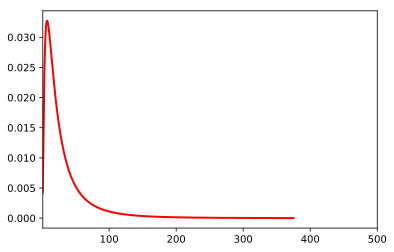

In [36]:
mu, sigma = 3., 1. # mean and standard deviation

n_b_cells = 25

index = 16

s = np.random.lognormal(mu, sigma, n_b_cells)

# count, bins, ignored = plt.hist(s, bins=range(0, 400, 25), density=False, align='mid')

x = np.linspace(min(bins), max(bins), 10000)
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.xlim(1, 500)

In [180]:
bins

array([  0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300,
       325, 350, 375])

In [181]:
len(count)

15

In [182]:
count

array([12.,  9.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [182]:
np.sum(count*28.9)

0.5429502295112747

In [177]:
bins[2]-bins[1]

28.90010559021035

(0, 0.1)

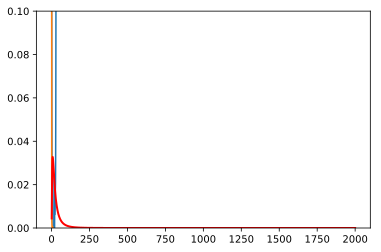

In [66]:
ntotal = np.sum(n0, axis=0)
plt.plot(range(len(ntotal)), ntotal/np.sum(ntotal))
plt.plot(range(len(count)), count/np.sum(count))

x = np.linspace(1, 2000, 10000)

pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.ylim(0, 0.1)

In [59]:
count

array([2.433e+03, 5.400e+01, 7.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00])

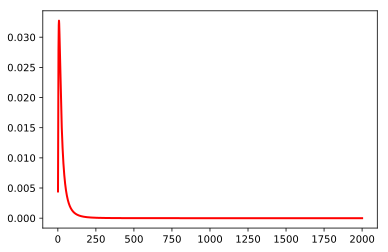

In [20]:
mu, sigma = 3., 1. # mean and standard deviation

s = np.random.lognormal(mu, sigma, n_b_cells)
    count, bins = np.histogram(s, index)

x = np.linspace(1, 2000, 10000)

pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')

In [19]:
np.mean(n0, axis=0)

array([11.47,  4.94,  2.91,  1.72,  0.83,  0.7 ,  0.53,  0.32,  0.36,
        1.22,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  1.29,  0.27,  0.38,  0.66,  0.69,  1.33,
        2.07,  2.81,  5.34, 10.16])

In [2]:
'/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/Sigma_1.5/'

'/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/Sigma_1.5/'

In [3]:
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/'
sigma = 1.5

protocols = ExtendedBreadthProcessProtocolData(path, sigma)


# sigma = 1.3

In [4]:
p0 = protocols.compute_p0()

Loading trajectory 0
Loading trajectory 1
Loading trajectory 2
Loading trajectory 3
Loading trajectory 4
Loading trajectory 5
Loading trajectory 6
Loading trajectory 7
Loading trajectory 8
Loading trajectory 9
Loading trajectory 10
Loading trajectory 11
Loading trajectory 12
Loading trajectory 13
Loading trajectory 14
Loading trajectory 15
Loading trajectory 16
Loading trajectory 17
Loading trajectory 18
Loading trajectory 19
Loading trajectory 20
Loading trajectory 21
Loading trajectory 22
Loading trajectory 23
Loading trajectory 24
Loading trajectory 25
Loading trajectory 26
Loading trajectory 27
Loading trajectory 28
Loading trajectory 29
Loading trajectory 30
Loading trajectory 31
Loading trajectory 32
Loading trajectory 33
Loading trajectory 34
Loading trajectory 35
Loading trajectory 36
Loading trajectory 37
Loading trajectory 38
Loading trajectory 39
Loading trajectory 40
Loading trajectory 41
Loading trajectory 42
Loading trajectory 43
Loading trajectory 44
Loading trajectory 4

31

In [4]:
traj = np.loadtxt(path + "hashed_traj_1")

In [10]:
traj[0][1:]

array([15.,  3.,  1.,  0.,  2.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  3.,  5.,  8.,  7.])

In [13]:
p0

array([0.2102, 0.1086, 0.0576, 0.0338, 0.024 , 0.0164, 0.0118, 0.0084,
       0.0064, 0.0228, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.0254, 0.0046, 0.0076,
       0.011 , 0.013 , 0.0222, 0.0368, 0.0576, 0.1026, 0.2192])

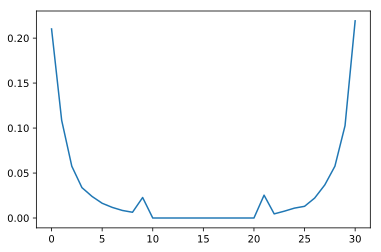

In [15]:
plt.plot(range(len(p0)), p0)

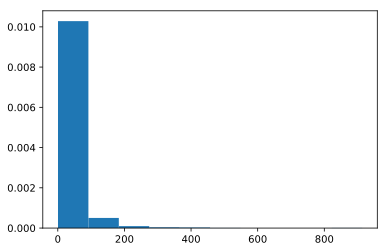

In [11]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 2500)
count, bins, ignored = plt.hist(s, 10, density=True, align='mid')



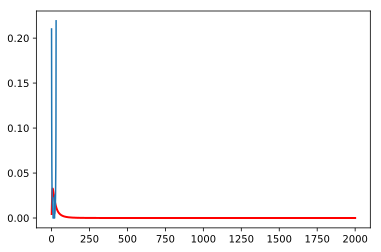

In [8]:
mu, sigma = 3., 1. # mean and standard deviation
x = np.linspace(1, 2000, 10000)

pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')


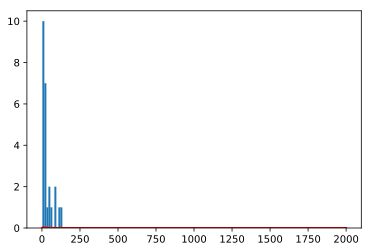

In [9]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 25)
count, bins, ignored = plt.hist(s, 10, density=False, align='mid')

x = np.linspace(1, 2000, 10000)

pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')

In [10]:
count

array([10.,  7.,  1.,  2.,  1.,  0.,  2.,  0.,  1.,  1.])

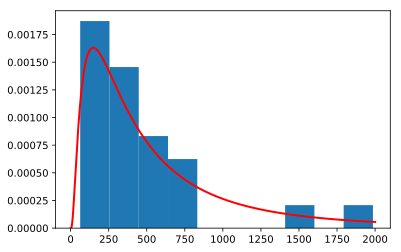

In [17]:
mu, sigma = 6., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 25)
count, bins, ignored = plt.hist(s, 10, density=True, align='mid')

x = np.linspace(1, 2000, 10000)

pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')

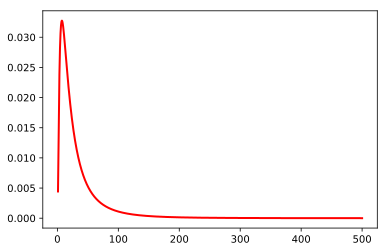

In [11]:
x = np.linspace(1, 500, 10000)

pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')

In [9]:
b_cells = pickle_in_data(path + "Sigma_{0}/".format(sigma))

IOError: [Errno 2] No such file or directory: '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/Sigma_1.0/.pickle'